### Correlation

In [1]:
#Scatter plot
library(ggplot2)

In [ ]:
ggplot(df, aes(x, y)) +
    geom_point() +
    geom_smooth(method="lm", se=FALSE)

In [ ]:
# Correlation function info
?cor()

In [ ]:
# Correlation function
cor(x, y)

In [ ]:
# Correlation function with missing values
cor(x, y, use="pairwise.complete.obs")

In [ ]:
# Correlation significance test
cor.test(x, y)

#### Correlation: Example 1

In [2]:
# Load data
data <- read.csv("/Users/danielvalle/Box Sync/Olemiss_Fall_2022/LING691_Quantitative_research_methods/Datasets/ELP_full_length_frequency.csv", header=TRUE, sep=',')

In [3]:
# Explore first observations of data
head(data)

,Word,Log10Freq,length,RT
,<chr>,<dbl>,<int>,<dbl>
1,zenith,1.342423,5,753.69
2,zephyr,1.698970,4,874.58
3,zeroed,1.301030,5,929.23
4,zeros,1.698970,5,625.09
5,zest,1.544068,4,658.82
6,zigzag,1.361728,6,785.26


`geom_smooth()` using formula 'y ~ x'



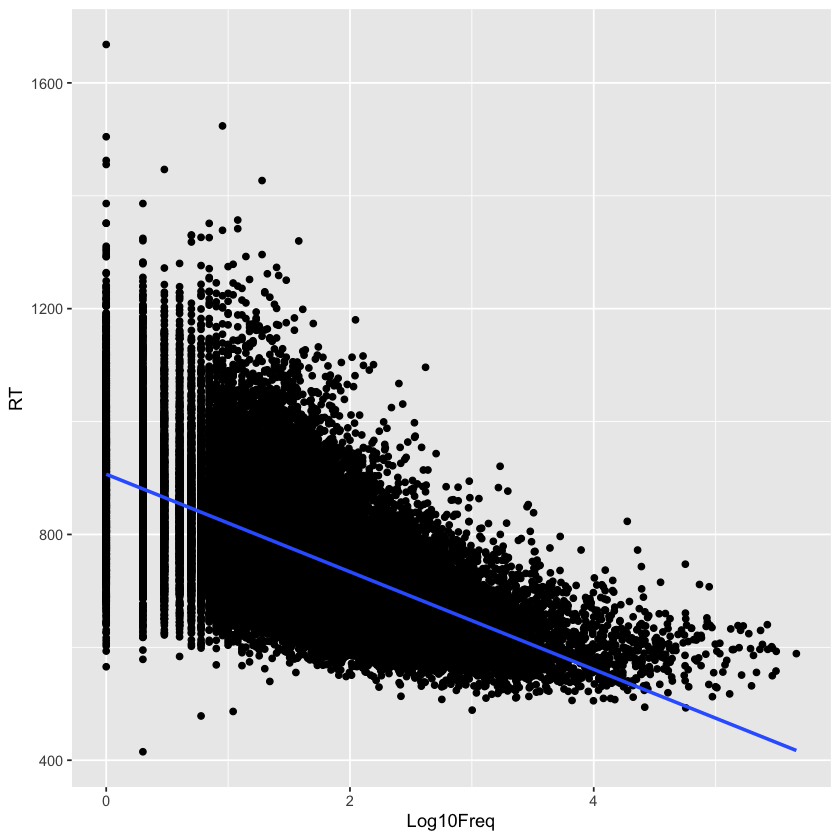

In [4]:
# Scatter plot - visualize data
ggplot(data, aes(Log10Freq, RT)) +
    geom_point() +
    geom_smooth(method="lm", se=FALSE)

In [5]:
# Pearson correlation coefficient
cor(data$Log10Freq, data$RT)

[1] -0.6192081

In [6]:
# Correlation significance test
cor.test(data$Log10Freq, data$RT)


	Pearson's product-moment correlation

data:  data$Log10Freq and data$RT
t = -143.41, df = 33073, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6258090 -0.6125185
sample estimates:
       cor 
-0.6192081 


In [7]:
# Correlation test - outputs
test <- cor.test(data$Log10Freq, data$RT)
test$p.value
test$conf.int
test$method
test$alternative
test$parameter

[1] 0

[1] -0.6258090 -0.6125185
attr(,"conf.level")
[1] 0.95

[1] "Pearson's product-moment correlation"

[1] "two.sided"

df 
33073

#### Example 2: outliers 

In [38]:
# Load data
data <- read.csv("/Users/danielvalle/Box Sync/Olemiss_Fall_2022/LING691_Quantitative_research_methods/Datasets/perry_winter_2017_iconicity.csv", header=TRUE, sep=',')

In [39]:
# Explore data
head(data)

,Word,POS,SER,CorteseImag,Conc,Syst,Freq,Iconicity
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,a,Grammatical,NA,NA,1.46,NA,1041179,0.4615385
2,abide,Verb,NA,NA,1.68,NA,138,0.2500000
3,able,Adjective,1.73,NA,2.38,NA,8155,0.4666667
4,about,Grammatical,1.20,NA,1.77,NA,185206,-0.1000000
5,above,Grammatical,2.91,NA,3.33,NA,2493,1.0625000
6,abrasive,Adjective,NA,NA,3.03,NA,23,1.3125000


In [40]:
# Explore data
summary(data)

     Word               POS                 SER         CorteseImag   
 Length:3001        Length:3001        Min.   :1.000   Min.   :1.200  
 Class :character   Class :character   1st Qu.:2.450   1st Qu.:3.600  
 Mode  :character   Mode  :character   Median :3.180   Median :4.700  
                                       Mean   :3.216   Mean   :4.674  
                                       3rd Qu.:4.000   3rd Qu.:6.100  
                                       Max.   :6.560   Max.   :6.900  
                                       NA's   :1222    NA's   :1828   
      Conc            Syst             Freq           Iconicity      
 Min.   :1.120   Min.   :-5e-04   Min.   :      1   Min.   :-2.8000  
 1st Qu.:3.060   1st Qu.:-1e-04   1st Qu.:     73   1st Qu.: 0.1538  
 Median :3.930   Median : 0e+00   Median :    357   Median : 0.7857  
 Mean   :3.783   Mean   : 0e+00   Mean   :  11085   Mean   : 0.9159  
 3rd Qu.:4.750   3rd Qu.: 0e+00   3rd Qu.:   1676   3rd Qu.: 1.5714  
 Max.   :5.0

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 53 rows containing missing values (geom_text).”
Warning message:
“Removed 53 rows containing missing values (geom_point).”


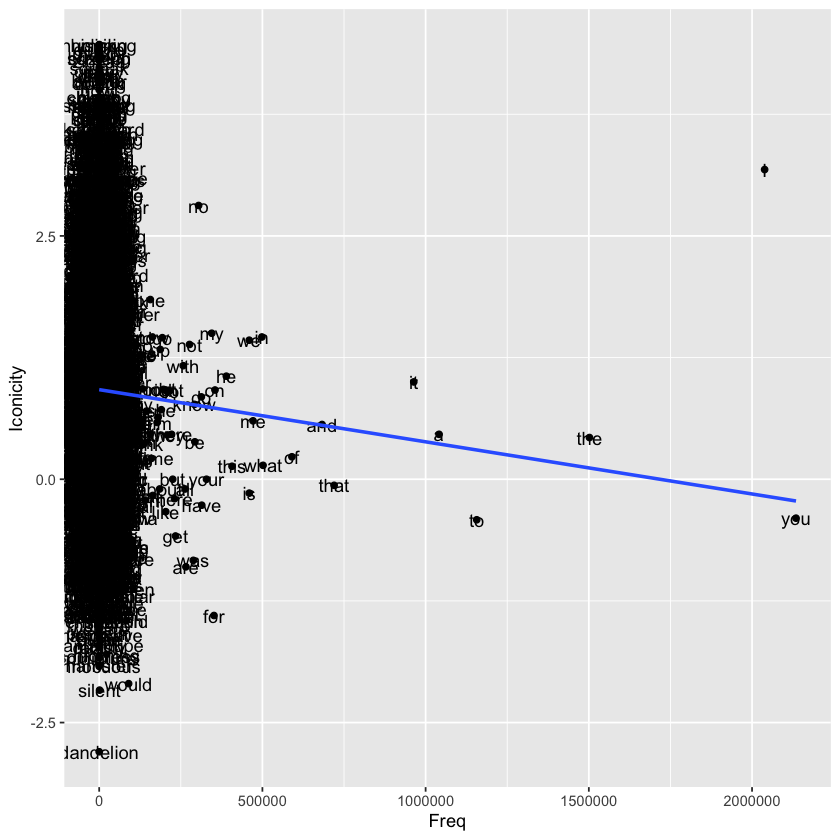

In [41]:
# Visualize data - Scatter plot
ggplot(data, aes(Freq, Iconicity, label =Word)) +
    geom_text() + 
    geom_point() +
    geom_smooth(method="lm", se=FALSE)

In [42]:
# Pearson correlation significance test
cor.test(data$Freq, data$Iconicity)


	Pearson's product-moment correlation

data:  data$Freq and data$Iconicity
t = -2.083, df = 2946, p-value = 0.03734
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.074346084 -0.002250551
sample estimates:
        cor 
-0.03834822 


In [43]:
# Delete outliers - values larger than 250 000 in this data set
data <- data[!rowSums(data[7] >250000),]
summary(data)

     Word               POS                 SER         CorteseImag  
 Length:2971        Length:2971        Min.   :1.000   Min.   :1.20  
 Class :character   Class :character   1st Qu.:2.500   1st Qu.:3.70  
 Mode  :character   Mode  :character   Median :3.200   Median :4.70  
                                       Mean   :3.244   Mean   :4.74  
                                       3rd Qu.:4.000   3rd Qu.:6.10  
                                       Max.   :6.560   Max.   :6.90  
                                       NA's   :1219    NA's   :1825  
      Conc            Syst             Freq            Iconicity      
 Min.   :1.120   Min.   :-5e-04   Min.   :     1.0   Min.   :-2.8000  
 1st Qu.:3.070   1st Qu.:-1e-04   1st Qu.:    72.0   1st Qu.: 0.1538  
 Median :3.930   Median : 0e+00   Median :   348.5   Median : 0.7929  
 Mean   :3.799   Mean   : 0e+00   Mean   :  4939.9   Mean   : 0.9184  
 3rd Qu.:4.750   3rd Qu.: 0e+00   3rd Qu.:  1596.8   3rd Qu.: 1.5714  
 Max.   :5.000

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 53 rows containing missing values (geom_text).”
Warning message:
“Removed 53 rows containing missing values (geom_point).”


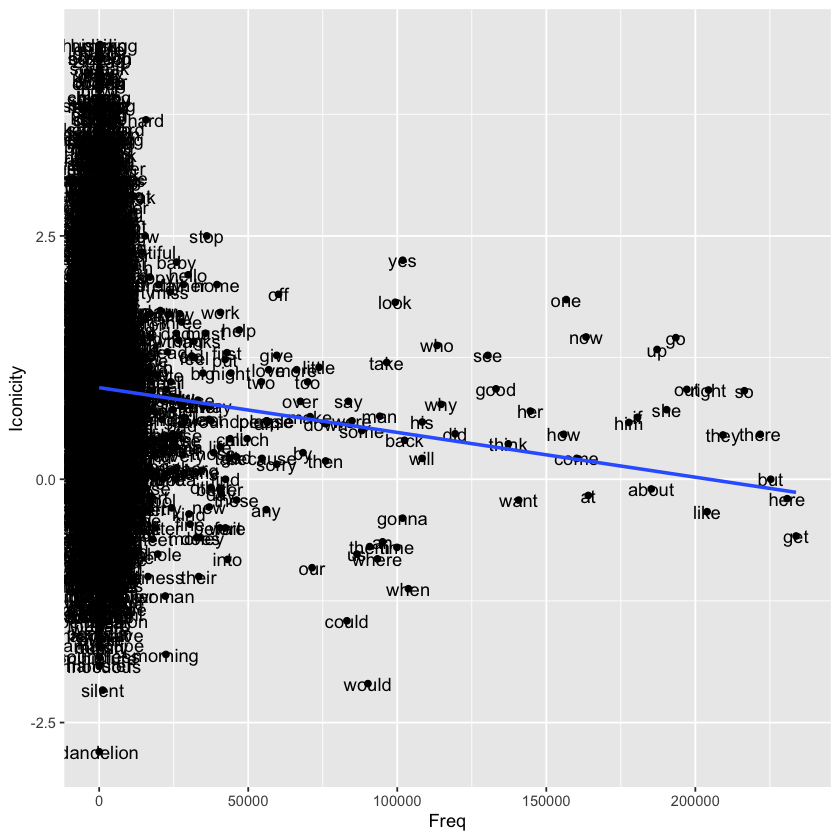

In [45]:
ggplot(data, aes(Freq, Iconicity, label =Word)) +
    geom_text() + 
    geom_point() +
    geom_smooth(method="lm", se=FALSE)

In [46]:
# Pearson correlation significance test
cor.test(data$Freq, data$Iconicity)


	Pearson's product-moment correlation

data:  data$Freq and data$Iconicity
t = -4.4417, df = 2916, p-value = 9.256e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1179127 -0.0458279
sample estimates:
       cor 
-0.0819775 


#### Spearman correlation: one continuous variable and one dichotomous variable

In [20]:
# Load data
data <- read.csv("/Users/danielvalle/Box Sync/Olemiss_Fall_2022/LING691_Quantitative_research_methods/Datasets/winter_matlock_2013_similarity.csv", header=TRUE, sep=',')

In [21]:
head(data)

,Sem,Phon,Distance
,<chr>,<chr>,<int>
1,Different,Similar,76
2,Different,Different,110
3,Similar,Similar,214
4,Different,Different,41
5,Different,Different,78
6,Different,Similar,87


In [22]:
# Create new column with 0s and 1s from column 'Phon'
data$Phon_num <-ifelse(data$Phon=="Different",1,0)
head(data)

,Sem,Phon,Distance,Phon_num
,<chr>,<chr>,<int>,<dbl>
1,Different,Similar,76,0
2,Different,Different,110,1
3,Similar,Similar,214,0
4,Different,Different,41,1
5,Different,Different,78,1
6,Different,Similar,87,0


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


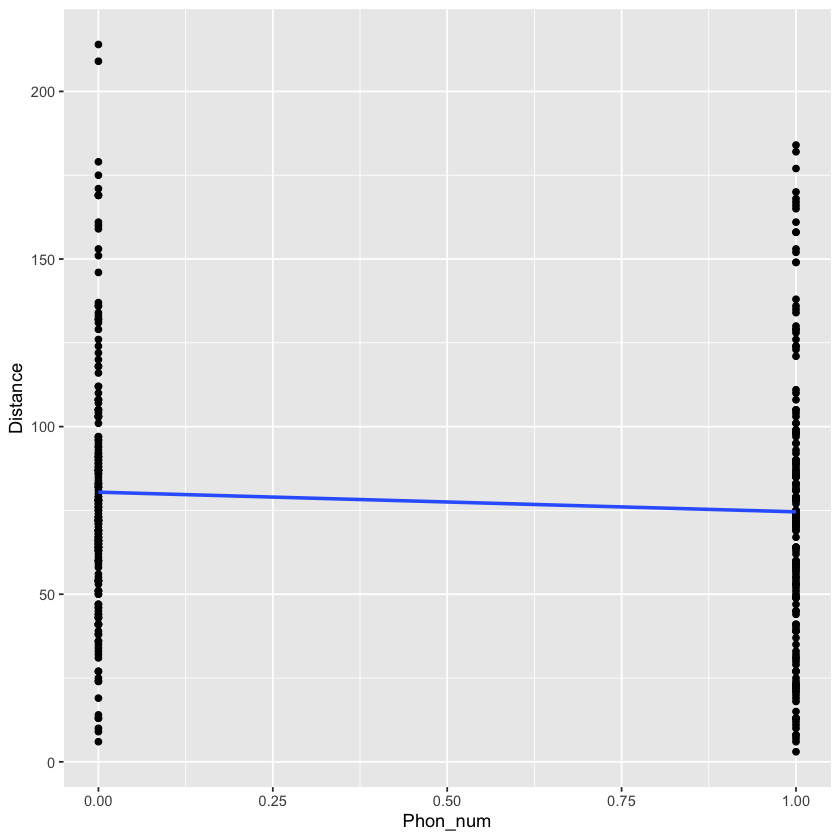

In [23]:
# Scatterplot
ggplot(data, aes(Phon_num, Distance)) +
    geom_point() +
    geom_smooth(method="lm", se=FALSE)

In [24]:
# Correlation coefficient
cor(data$Phon_num, data$Distance, method="spearman", use="pairwise.complete.obs")

[1] -0.07743637

In [25]:
# Correlation test
cor.test(data$Phon_num, data$Distance, method="spearman", use="pairwise.complete.obs")

Warning message in cor.test.default(data$Phon_num, data$Distance, method = "spearman", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$Phon_num and data$Distance
S = 8589284, p-value = 0.1409
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.07743637 
